In [1]:
# !pip install pytesseract
# !conda install pandas


from commonfunctions import *
import cv2 
import pytesseract



import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image

%matplotlib inline
%load_ext autoreload
%autoreload 2
import utlis
 


In [2]:

def _imshow(img):
    cv2.imshow('image', img)
    plt.show()
    # specify a wait key from keyboard
    k = cv2.waitKey(0) & 0xFF

    if k == 27: #esc in keyboard
        cv2.destroyAllWindows() #close the window   

    elif k == ord('s'): #if order is s save the image
        cv2.imwrite('lena_copy.png', img) #write image in your pc     
        cv2.destroyAllWindows() # close the window 

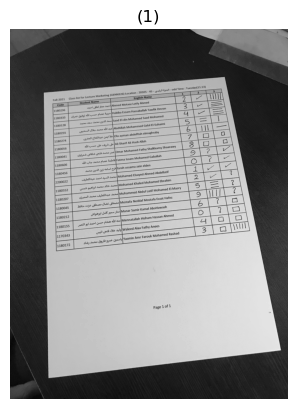

In [3]:
 
file = r"E:\CUFE\Fall22\IP\Project-2022\GradesAutoFiller-main\GradesAutoFiller-main\Module1\dataSet\7.jpg"
img = cv2.imread(file,0)
# plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
# img = io.imread("dataSet/7.jpg",as_gray=True)
# print(img)
# img = img * 255
heightImg = img.shape[1] 
widthImg  = img.shape[0] 
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()
# print(img.shape) 
# print(heightImg) 
# showHist(img)
show_images([img])

In [42]:
# utlis.initializeTrackbars()
# count=0

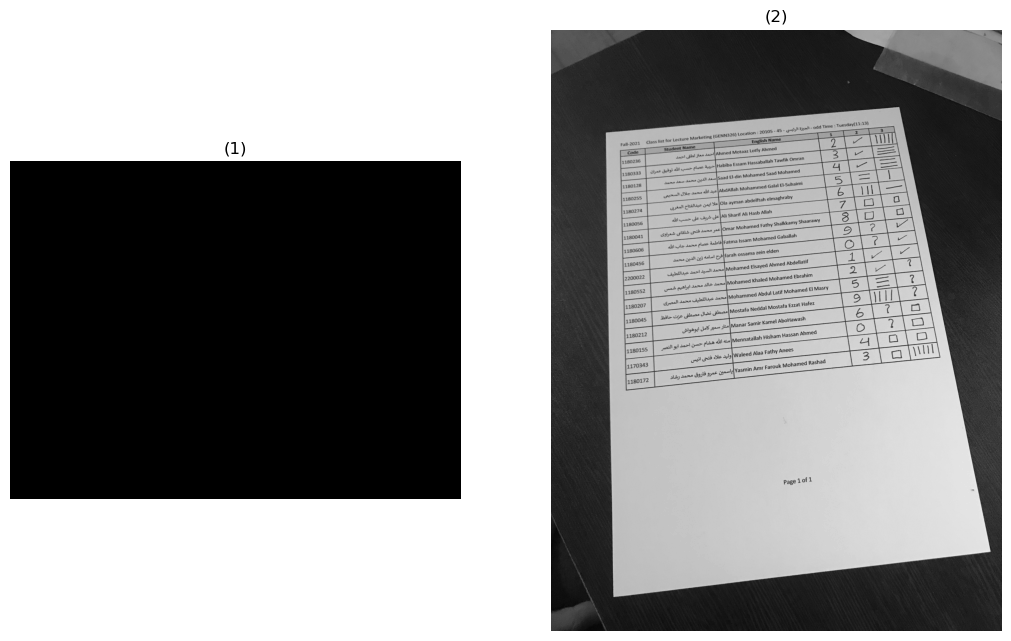

In [4]:
# img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
# img = cv2.resize(img, (int(480*2), int(640*2)))

imgBlank = np.zeros((heightImg,widthImg), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGING IF REQUIRED
# imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # CONVERT IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(img, (9, 9), 1) # ADD GAUSSIAN BLUR
imgBlur = img
# plt.imshow(imgGray,"gray")
# plt.show()
# showHist(img)
# io.show()
# _imshow(imgBlur)
show_images([imgBlank,imgBlur])


In [44]:


# thres=utlis.valTrackbars() # GET TRACK BAR VALUES FOR THRESHOLDS


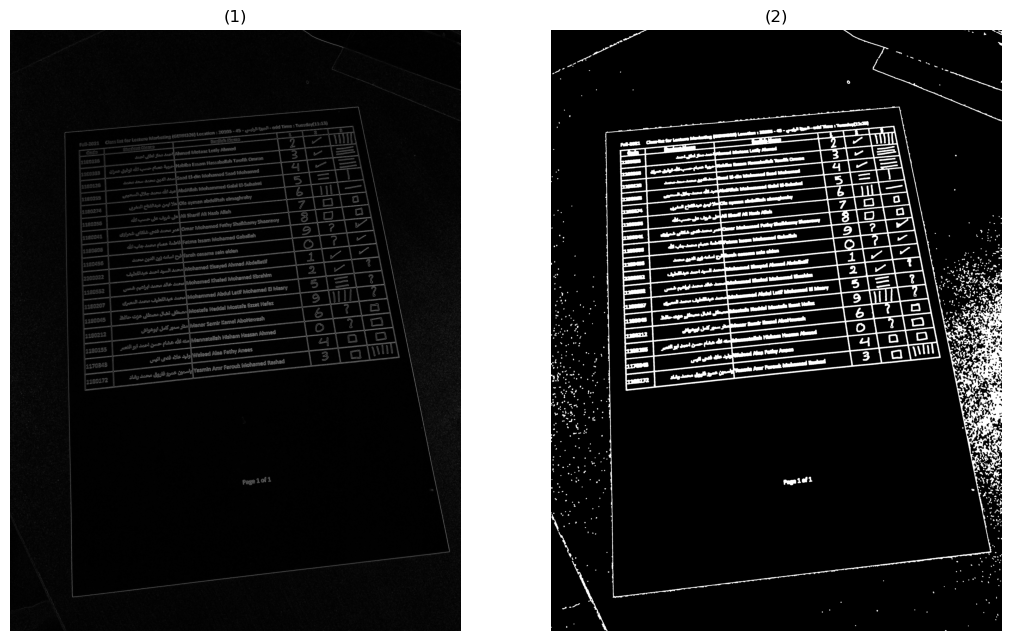

In [5]:
imgsobel = sobel(imgBlur)
# _imshow(imgsobel)
imgThreshold = cv2.Canny(imgBlur,100,150) # APPLY CANNY BLUR
kernel = np.ones((5, 5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLY DILATION
imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION
# _imshow(imgThreshold)
show_images([imgsobel,imgThreshold])

In [6]:

## FIND ALL COUNTOURS
imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
imgThreshold = cv2.cvtColor(imgThreshold,cv2.COLOR_BAYER_BG2BGR)



In [7]:

# FIND THE BIGGEST COUNTOUR
biggest, maxArea = utlis.biggestContour(contours) # FIND THE BIGGEST CONTOUR


In [8]:

if biggest.size != 0:
    biggest=utlis.reorder(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
    imgBigContour = utlis.drawRectangle(imgBigContour,biggest,2)
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

    #REMOVE 20 PIXELS FORM EACH SIDE
    # imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
    # imgWarpColored = cv2.resize(imgWarpColored,(widthImg,heightImg))

    # APPLY ADAPTIVE THRESHOLD
    # imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_RGB2GRAY)
    imgAdaptiveThre= cv2.adaptiveThreshold(imgWarpColored, 255, 1, 1, 7, 2)
    imgAdaptiveThre = cv2.bitwise_not(imgAdaptiveThre)
    imgAdaptiveThre=cv2.medianBlur(imgAdaptiveThre,3)
    # imgAdaptiveThre= cv2.cvtColor(imgAdaptiveThre,cv2.COLOR_BAYER_BG2GRAY)

# _imshow(imgAdaptiveThre)
thres = 100
img_bin = np.copy(imgAdaptiveThre)
img_bin[imgAdaptiveThre < thres] = 0
img_bin[imgAdaptiveThre >= thres] = 255
_imshow(img_bin)

# show_images([imgAdaptiveThre,img_bin])
